In [2]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [15]:
img_path = "Apple.jpg"
img = Image.open(img_path)

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
img_tensor = transform(img)
print(img_tensor.shape)

torch.Size([3, 256, 256])


In [4]:
img_ndarray = img_tensor.numpy().transpose((1, 2, 0))
print(img_ndarray.shape)

(256, 256, 3)


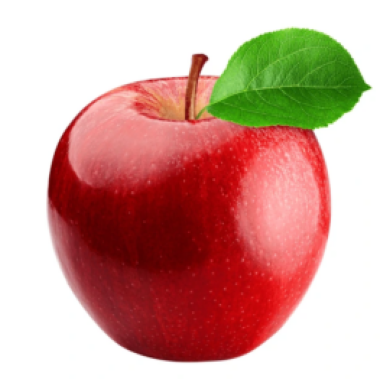

In [6]:
plt.imshow(img_ndarray)
plt.axis('off')
plt.show()

In [8]:
import torch.nn as nn
import torch

In [10]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        # print(x.shape)
        x = self.decoder(x)
        # print(x.shape)
        return x

model = AutoEncoder()
y = model(torch.randn(1, 3, 256, 256))
print(y.shape)

torch.Size([1, 8, 64, 64])
torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])


In [11]:
import torch.optim as optim

In [18]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs_num = 400

In [20]:
for epoch in range(epochs_num):
    output = model(img_tensor)
    loss_val = loss_fn(output, img_tensor)
    optimizer.zero_grad()
    loss_val.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(epoch + 1, loss_val.item())

torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
10 0.003746647387742996
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
torch.Size([3, 256, 256])
torch.Size([8, 64, 64])
to

torch.Size([8, 64, 64])
torch.Size([3, 256, 256])


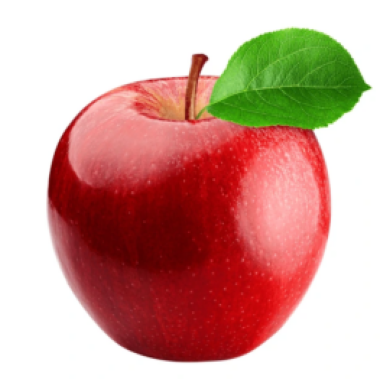

In [21]:
with torch.no_grad():
    img_recon = model(img_tensor)

img_ndarray = img_tensor.numpy().transpose((1, 2, 0))
plt.imshow(img_ndarray)
plt.axis('off')
plt.show()